**Servo Prediction using Linear Regression**







-------------

##**Get understanding about data**

---



---



**What is Servo** : In control engineering a servomechanism ,usually shortened to servo, is an automatic device that uses error-sensing negative feedback to correct the action of a mechanism. On displacement-controlled application,it usually includes a built-in encoder or other position feedback mechanism to ensure the output is achieving the desired effect. The term correctly applies only to systems where the feedback or error-correction signals help control mechanical position, speed, attitude or any other measurable variables. For example, an automotive power window control is not a servomechanism, as there is no automatic feedback that controls position- the operator does this by observation. By contrast a car's cruise control uses closed-loop feedback, which classifies it as a servomechanism.
A data frame with 167 observation on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo system involving a servo amplifier,a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on the transitional axes of a robot on the 9th floor of the AI lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point. The variables that describes the data set their values are the following:
1. Motor A,B,C,D,E
2. Screw A,B,C,D,E
2. Pgain 3,4,5,6
4. Vgain 1,2,3,4,5
5. Class 0.13 to 7.10


## **Import Library**

In [2]:
import pandas as pd

In [3]:
import numpy as np

## **Import CSV as DataFrame**

**Use URL of file directly**

In [4]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')


**or use local file path in Jupyter Notebook**

In [5]:
# df = pd.read_csv(r'C:\Users\YB Foundation\Desktop\Servo Mechanism.csv')

**or use file path after uploading file in Google Colab Notebook**

In [6]:
# df = pd.read_csv(r'/content/Servo Mechanism.csv')


## **Get the First Five Rows Of DataFrame**

In [7]:
df = pd.DataFrame({'Motor':['E', 'B', 'D', 'B', 'D'],
                   'Screw':['E', 'D', 'D', 'A', 'B'],
                   'Pgain': ['5', '6', '4', '3', '6'],
                   'Vgain': ['4', '5', '3', '2', '5'],
                   'Class': ['4', '11', '5', '48', '6']})
df

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,5
3,B,A,3,2,48
4,D,B,6,5,6


## **Get Information of DataFrame**






In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   5 non-null      object
 1   Screw   5 non-null      object
 2   Pgain   5 non-null      object
 3   Vgain   5 non-null      object
 4   Class   5 non-null      object
dtypes: object(5)
memory usage: 328.0+ bytes


## **Get the summary statistics**

In [10]:
df.describe()

,Motor,Screw,Pgain,Vgain,Class
count,5,5,5,5,5
unique,3,4,4,4,5
top,B,D,6,5,4
freq,2,2,2,2,1


## **Get Column Names**

In [11]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

## **Get Shape of DataFrame**

In [12]:
df.shape

(5, 5)

## **Get Categories and Counts of Categorical Variables**

In [13]:
df[['Motor']].value_counts()

Motor
B        2
D        2
E        1
dtype: int64

In [14]:
df[['Screw']].value_counts()

Screw
D        2
A        1
B        1
E        1
dtype: int64

## **Get Encoding of Categorical Features**

In [17]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [18]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

## **Define y (dependent or label or target variable) and X (independent or features or attribute Variable**

In [19]:
y = df['Class']

In [20]:
y.shape

(5,)

In [21]:
y

0     4
1    11
2     5
3    48
4     6
Name: Class, dtype: object

In [22]:
X = df[['Motor','Screw','Pgain','Vgain']]

or use .drop function to define X

In [23]:
X = df.drop('Class', axis=1)

In [24]:
X.shape

(5, 4)

In [25]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5


## **Get Train Test Split**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2529)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3, 4), (2, 4), (3,), (2,))

## **Get Model Train**


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train, y_train)

LinearRegression()

## **Get Model Predicition**


In [33]:
y_pred = lr.predict(X_test)

In [34]:
y_pred.shape

(2,)

In [35]:
y_pred

array([7.5       , 4.08448498])

## **Get Model Evaluation**


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
mean_squared_error(y_test, y_pred)

844.037174016103

In [41]:
mean_absolute_error(y_test, y_pred)

23.70775751145905

In [42]:
r2_score(y_test, y_pred)

-1.4661422177241872

## **Get Visualization of Actual Vs Predicted Results**

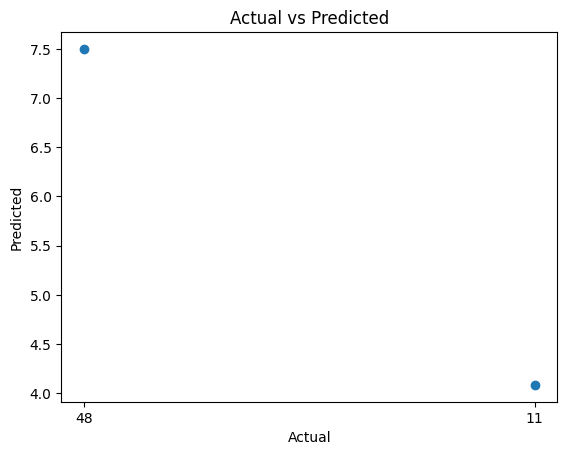

In [50]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

## **Get Future Predicitons**

**Lets select a random sample from existing dataset as new value**

Steps to follow
  1. Extract a random row using sample function
  2. Seperate X and Y
  3. Standardize X
  4. Predict

In [51]:
X_new = df.sample(1)

In [52]:
X_new

,Motor,Screw,Pgain,Vgain,Class
1,1,3,6,5,11


In [53]:
X_new.shape

(1, 5)

In [54]:
X_new = X_new.drop('Class',axis=1)

In [55]:
X_new

,Motor,Screw,Pgain,Vgain
1,1,3,6,5


In [56]:
X_new.shape

(1, 4)

In [57]:
y_pred_new = lr.predict(X_new)

In [58]:
y_pred_new

array([4.08448498])